Melhor acurácia -> 1.639344262295082%
Melhor RMSE     -> 36.32368147731688


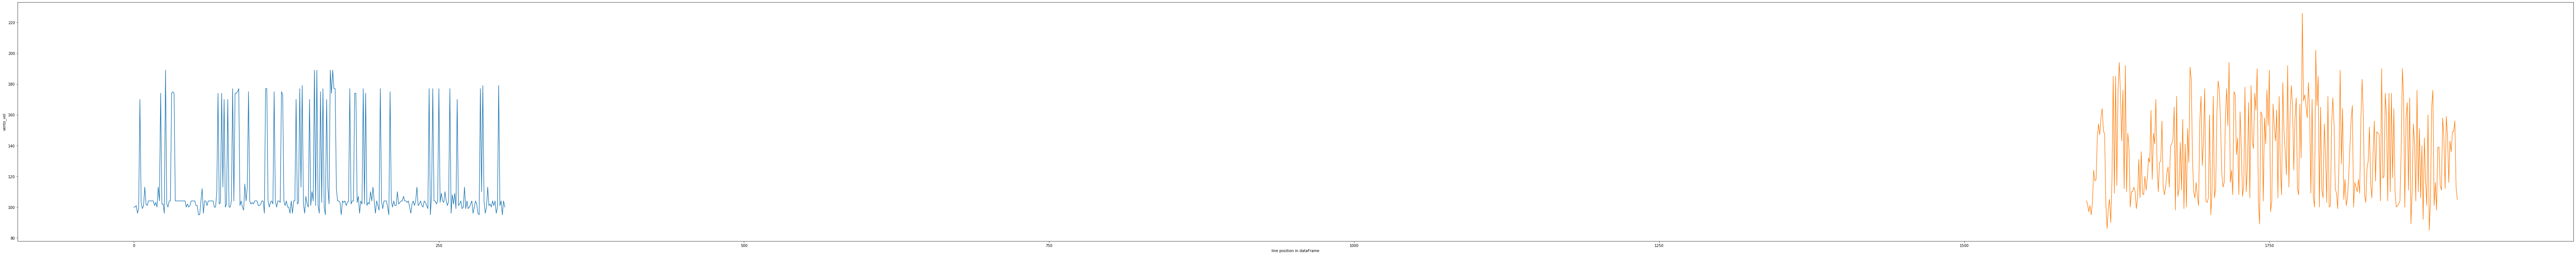

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']

data_for_knn = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
data_for_knn.head()

'''
       USING KNN ALGORITHM(CLASSIFICATION)

'''

len_validation = len(data_for_knn)

set_validation = data_for_knn[:381]
set_test_train = data_for_knn[381:]

x = set_test_train[['vento_rajada','vento_direcao']]
y = set_test_train[['vento_vel']]
x_validation = set_validation[['vento_rajada','vento_direcao']]
y_validation = set_validation[['vento_vel']]

def knn_test(x,y):
  
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,
                                                shuffle=False)
    knn = KNeighborsClassifier(n_neighbors = 100)
    knn.fit(train_x,train_y)
    predicts = knn.predict(test_x)
    
    acc = accuracy_score(test_y,predicts)
    rmse = math.sqrt(mean_squared_error(test_y, predicts))
    
    return acc,rmse,predicts,test_y

acc = knn_test(x,y)[0]
rmse = knn_test(x,y)[1]

print('Melhor acurácia -> {}%'.format(acc*100))
print('Melhor RMSE     -> {}'.format(rmse))  

#Plot both
plt.rcParams['figure.figsize'] = (25,12)
plt.plot(knn_test(x,y)[2])
plt.plot(knn_test(x,y)[3])
plt.xlabel('line position in dataFrame')
plt.ylabel('vento_vel')
plt.show()

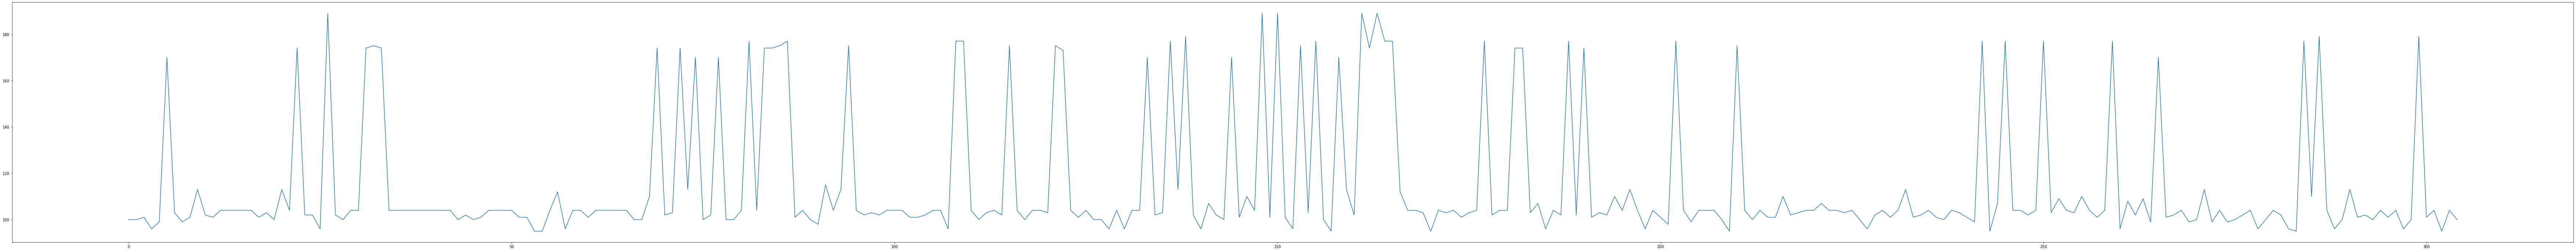

In [3]:
#Predicted
plt.plot(knn_test(x,y)[2])

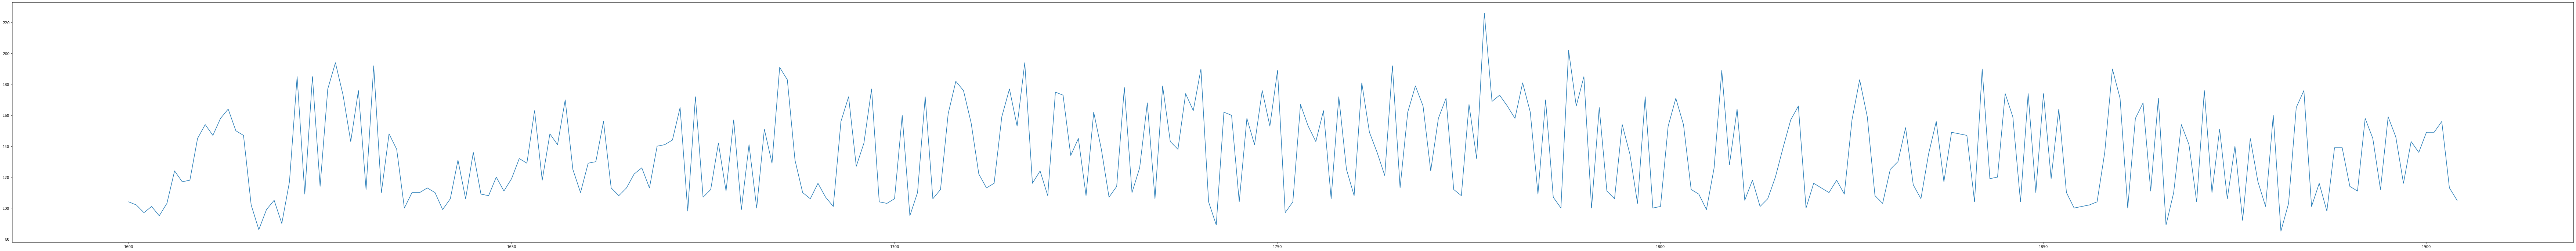

In [4]:
#Real
plt.plot(knn_test(x,y)[3])